## Before you start


In [ ]:
!nvidia-smi

Sat Jun  1 22:37:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="oO99nJqsCRKDatppwTNF")
project = rf.workspace("matrix-geoscience").project("carbon_object_detection")
version = project.version(3)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 806.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Carbon_Object_Detection-3 in yolov8:: 100%|██████████| 184/184 [00:00<00:00, 4873.74it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=70 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 148MB/s] 
New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Carbon_Object_Detection-3/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_s

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					   labels.jpg	     train_batch2.jpg
BoxF1_curve.png					   MaskF1_curve.png  train_batch300.jpg
BoxP_curve.png					   MaskP_curve.png   train_batch301.jpg
BoxPR_curve.png					   MaskPR_curve.png  train_batch302.jpg
BoxR_curve.png					   MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv	     val_batch0_pred.jpg
confusion_matrix.png				   results.png	     weights
events.out.tfevents.1717281563.0d14f44d7914.961.0  train_batch0.jpg
labels_correlogram.jpg				   train_batch1.jpg


/content


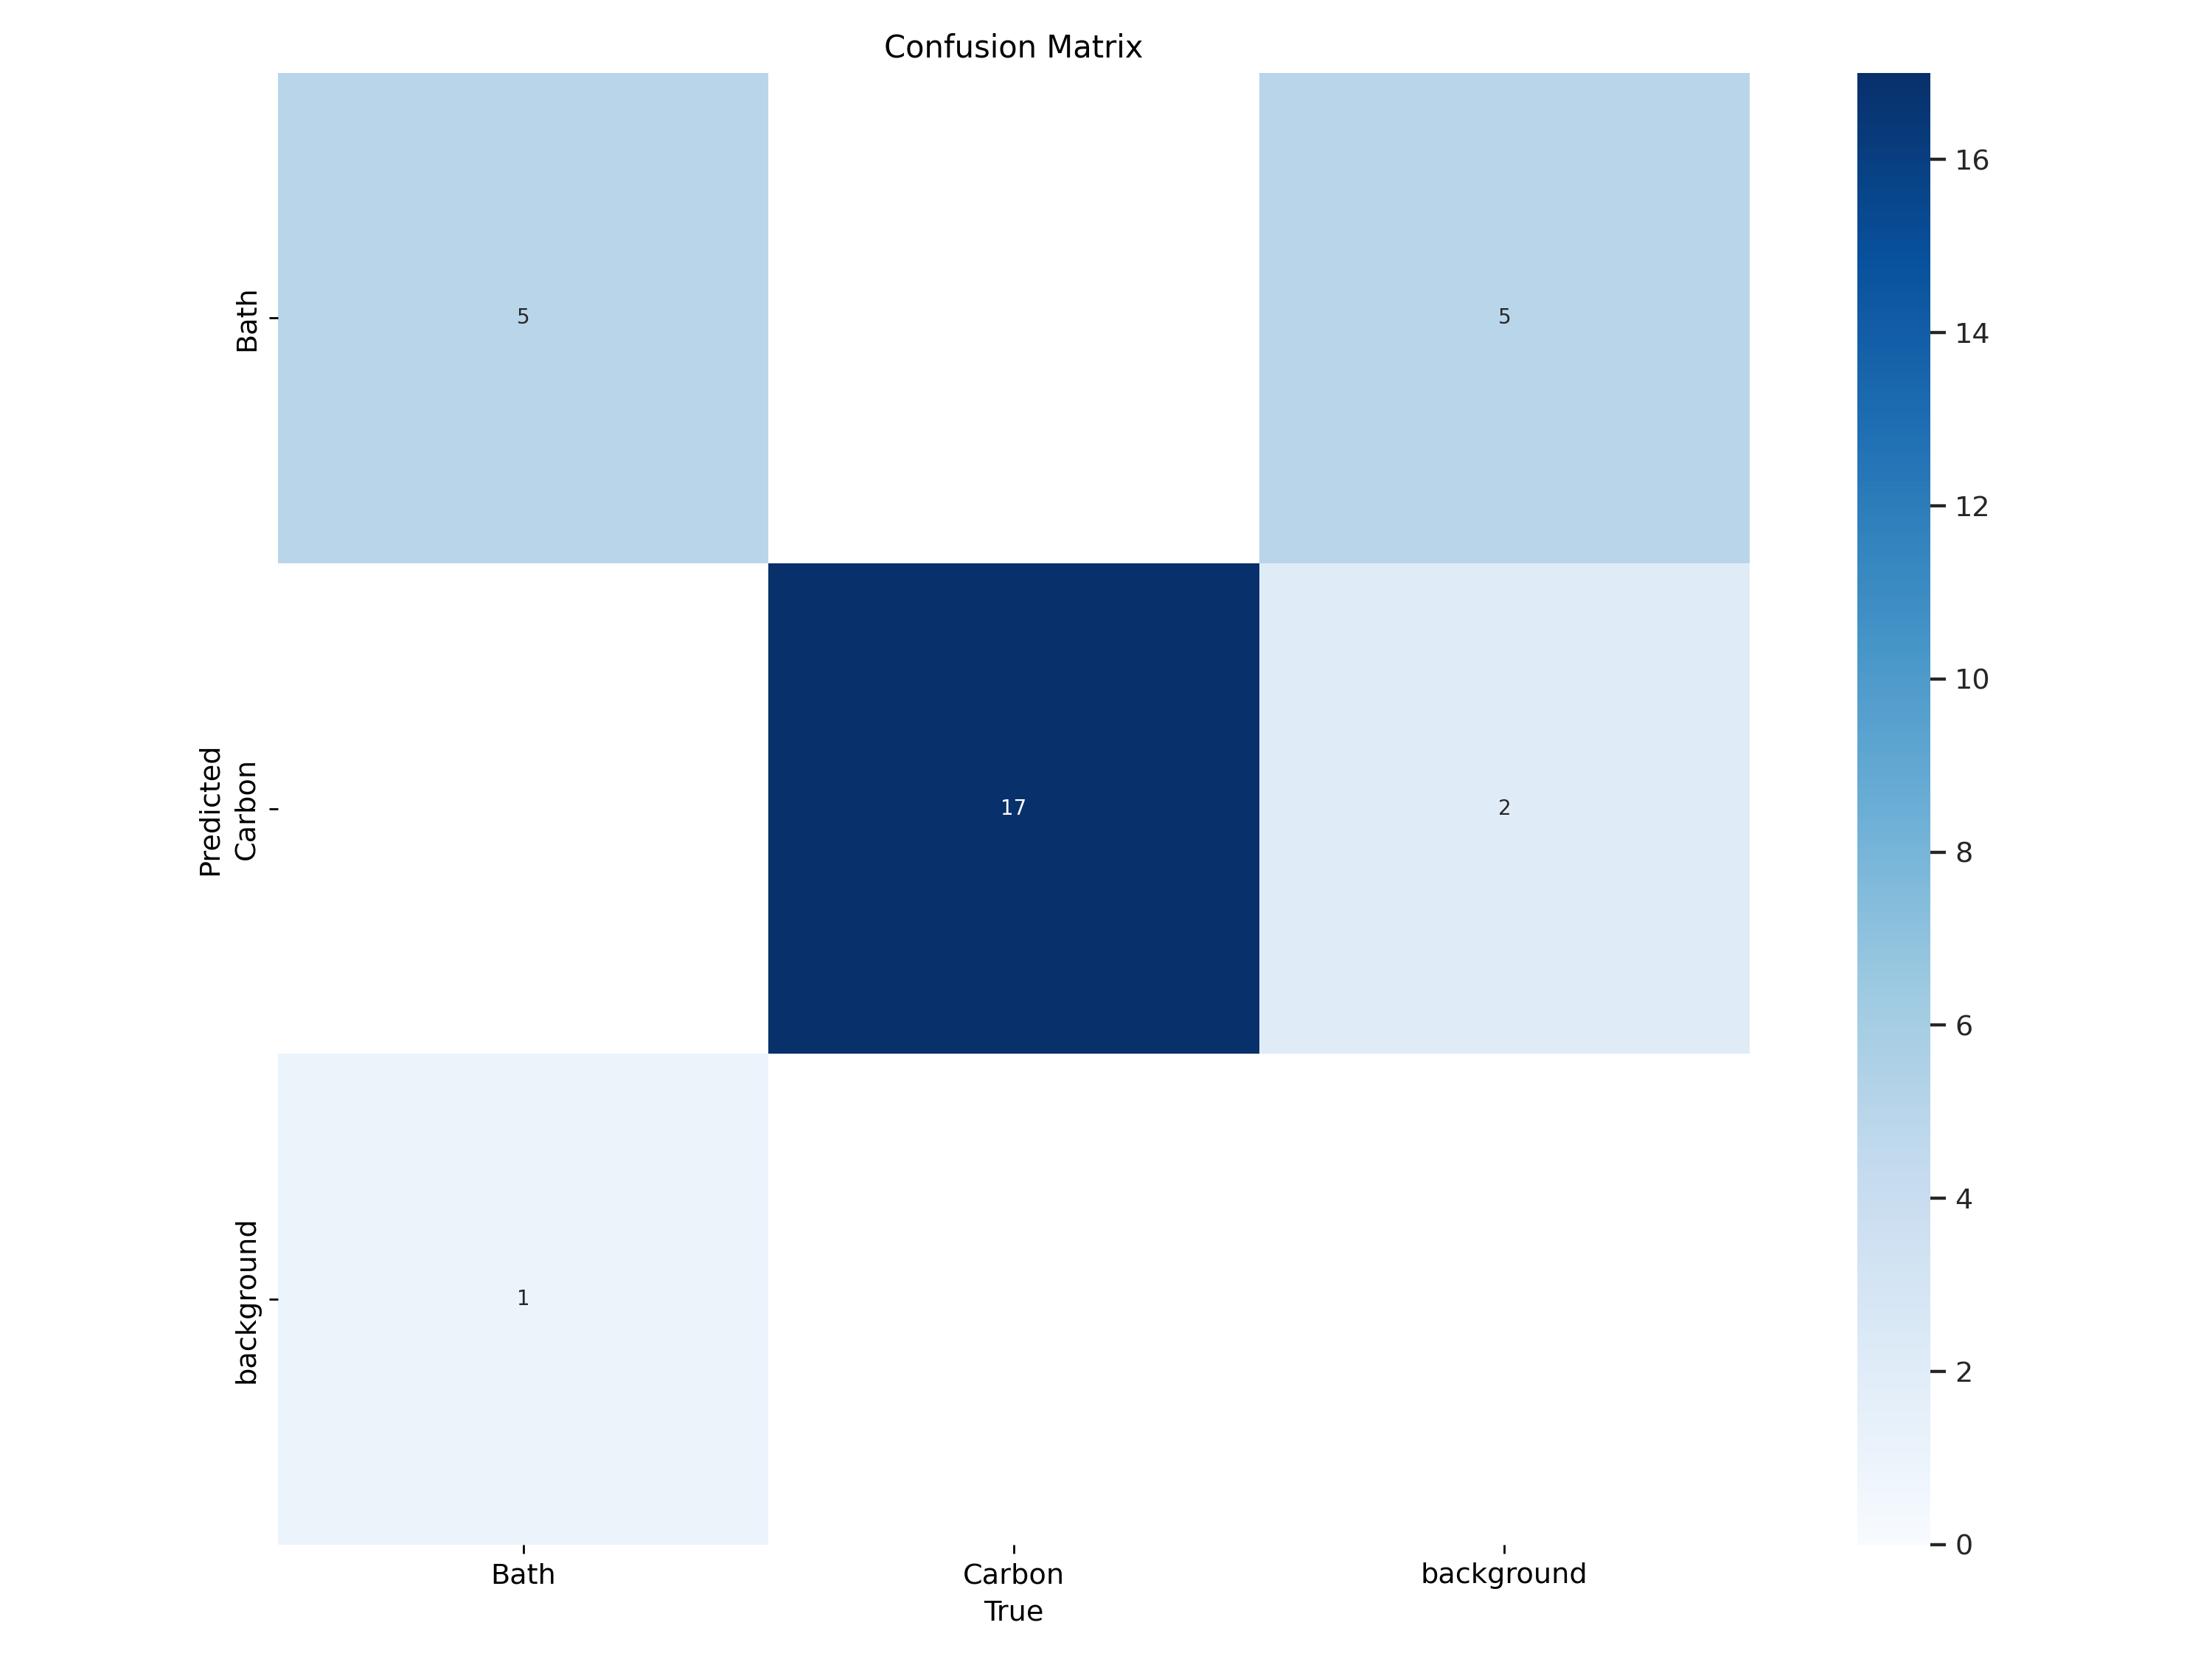

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


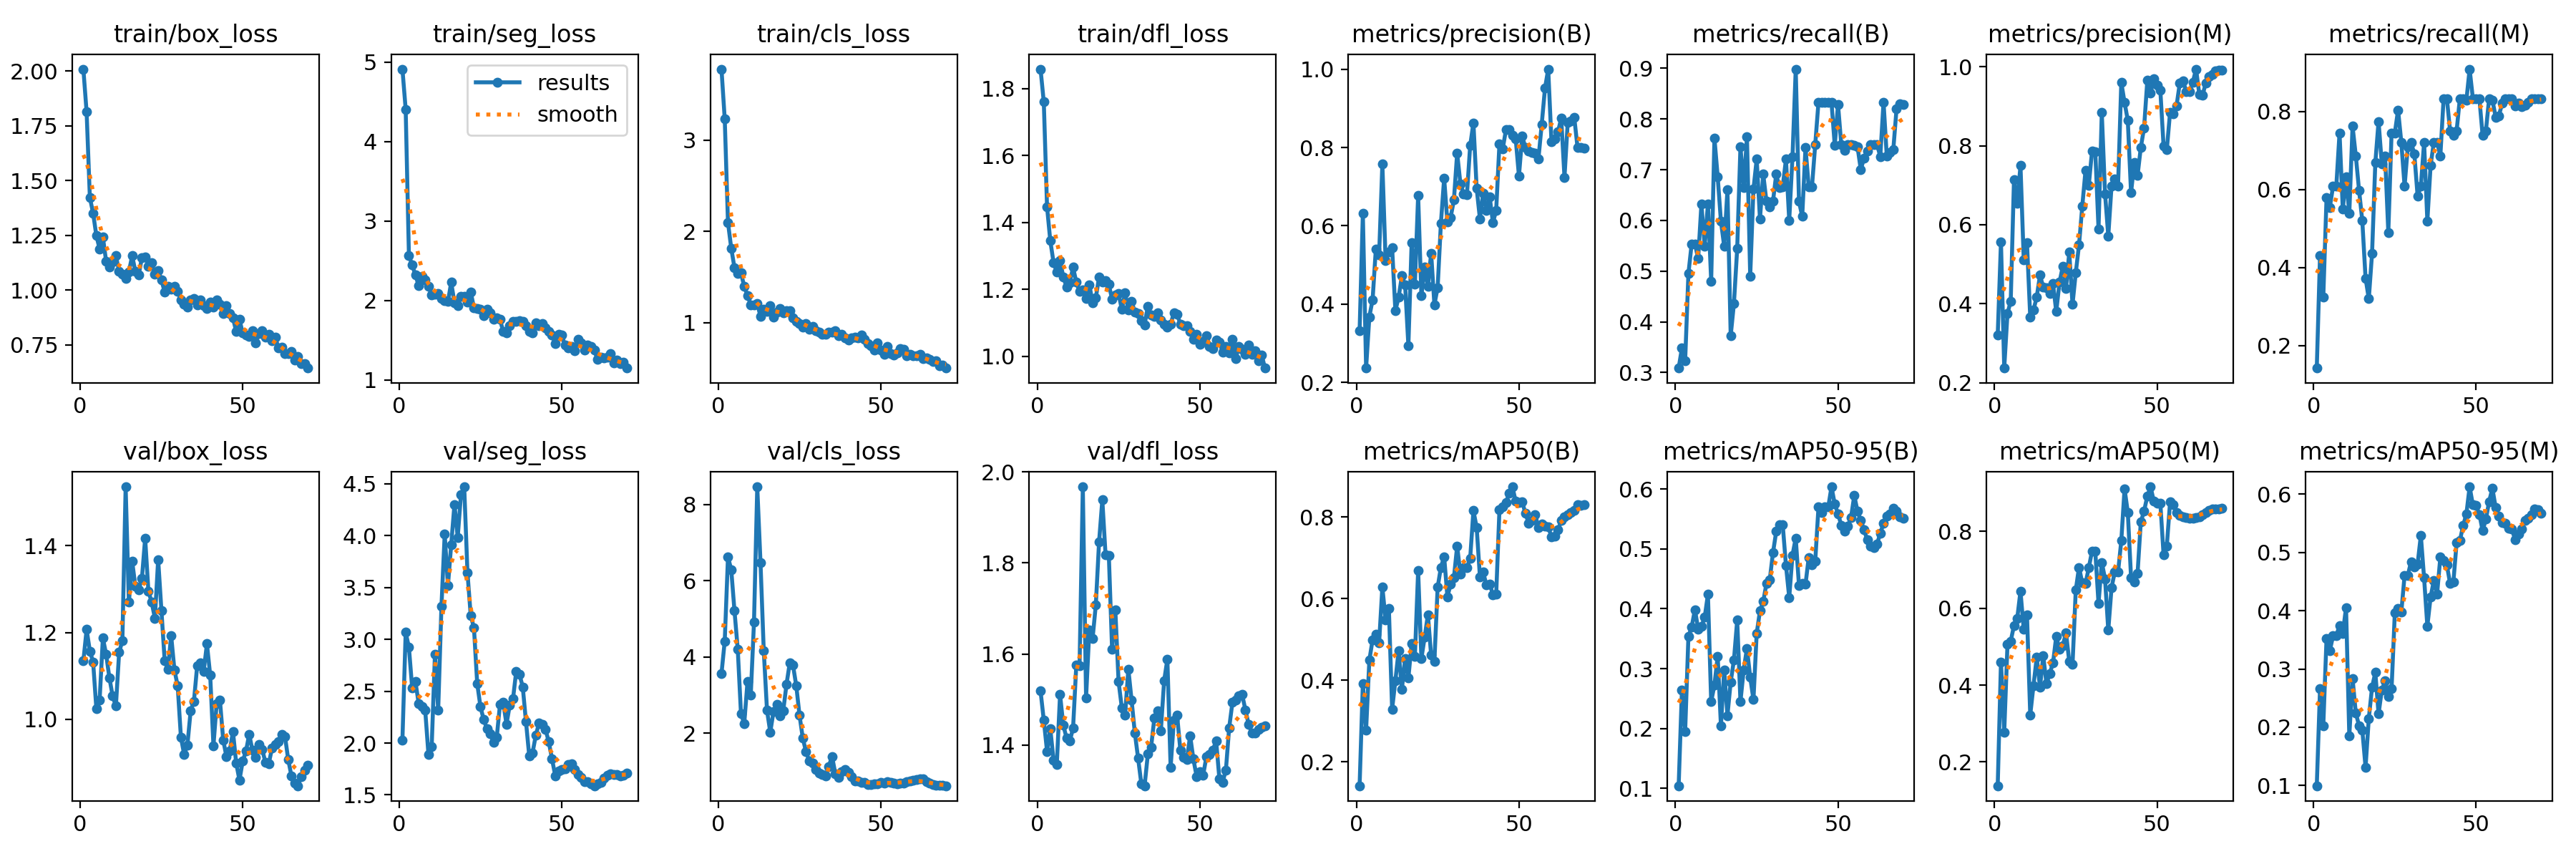

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


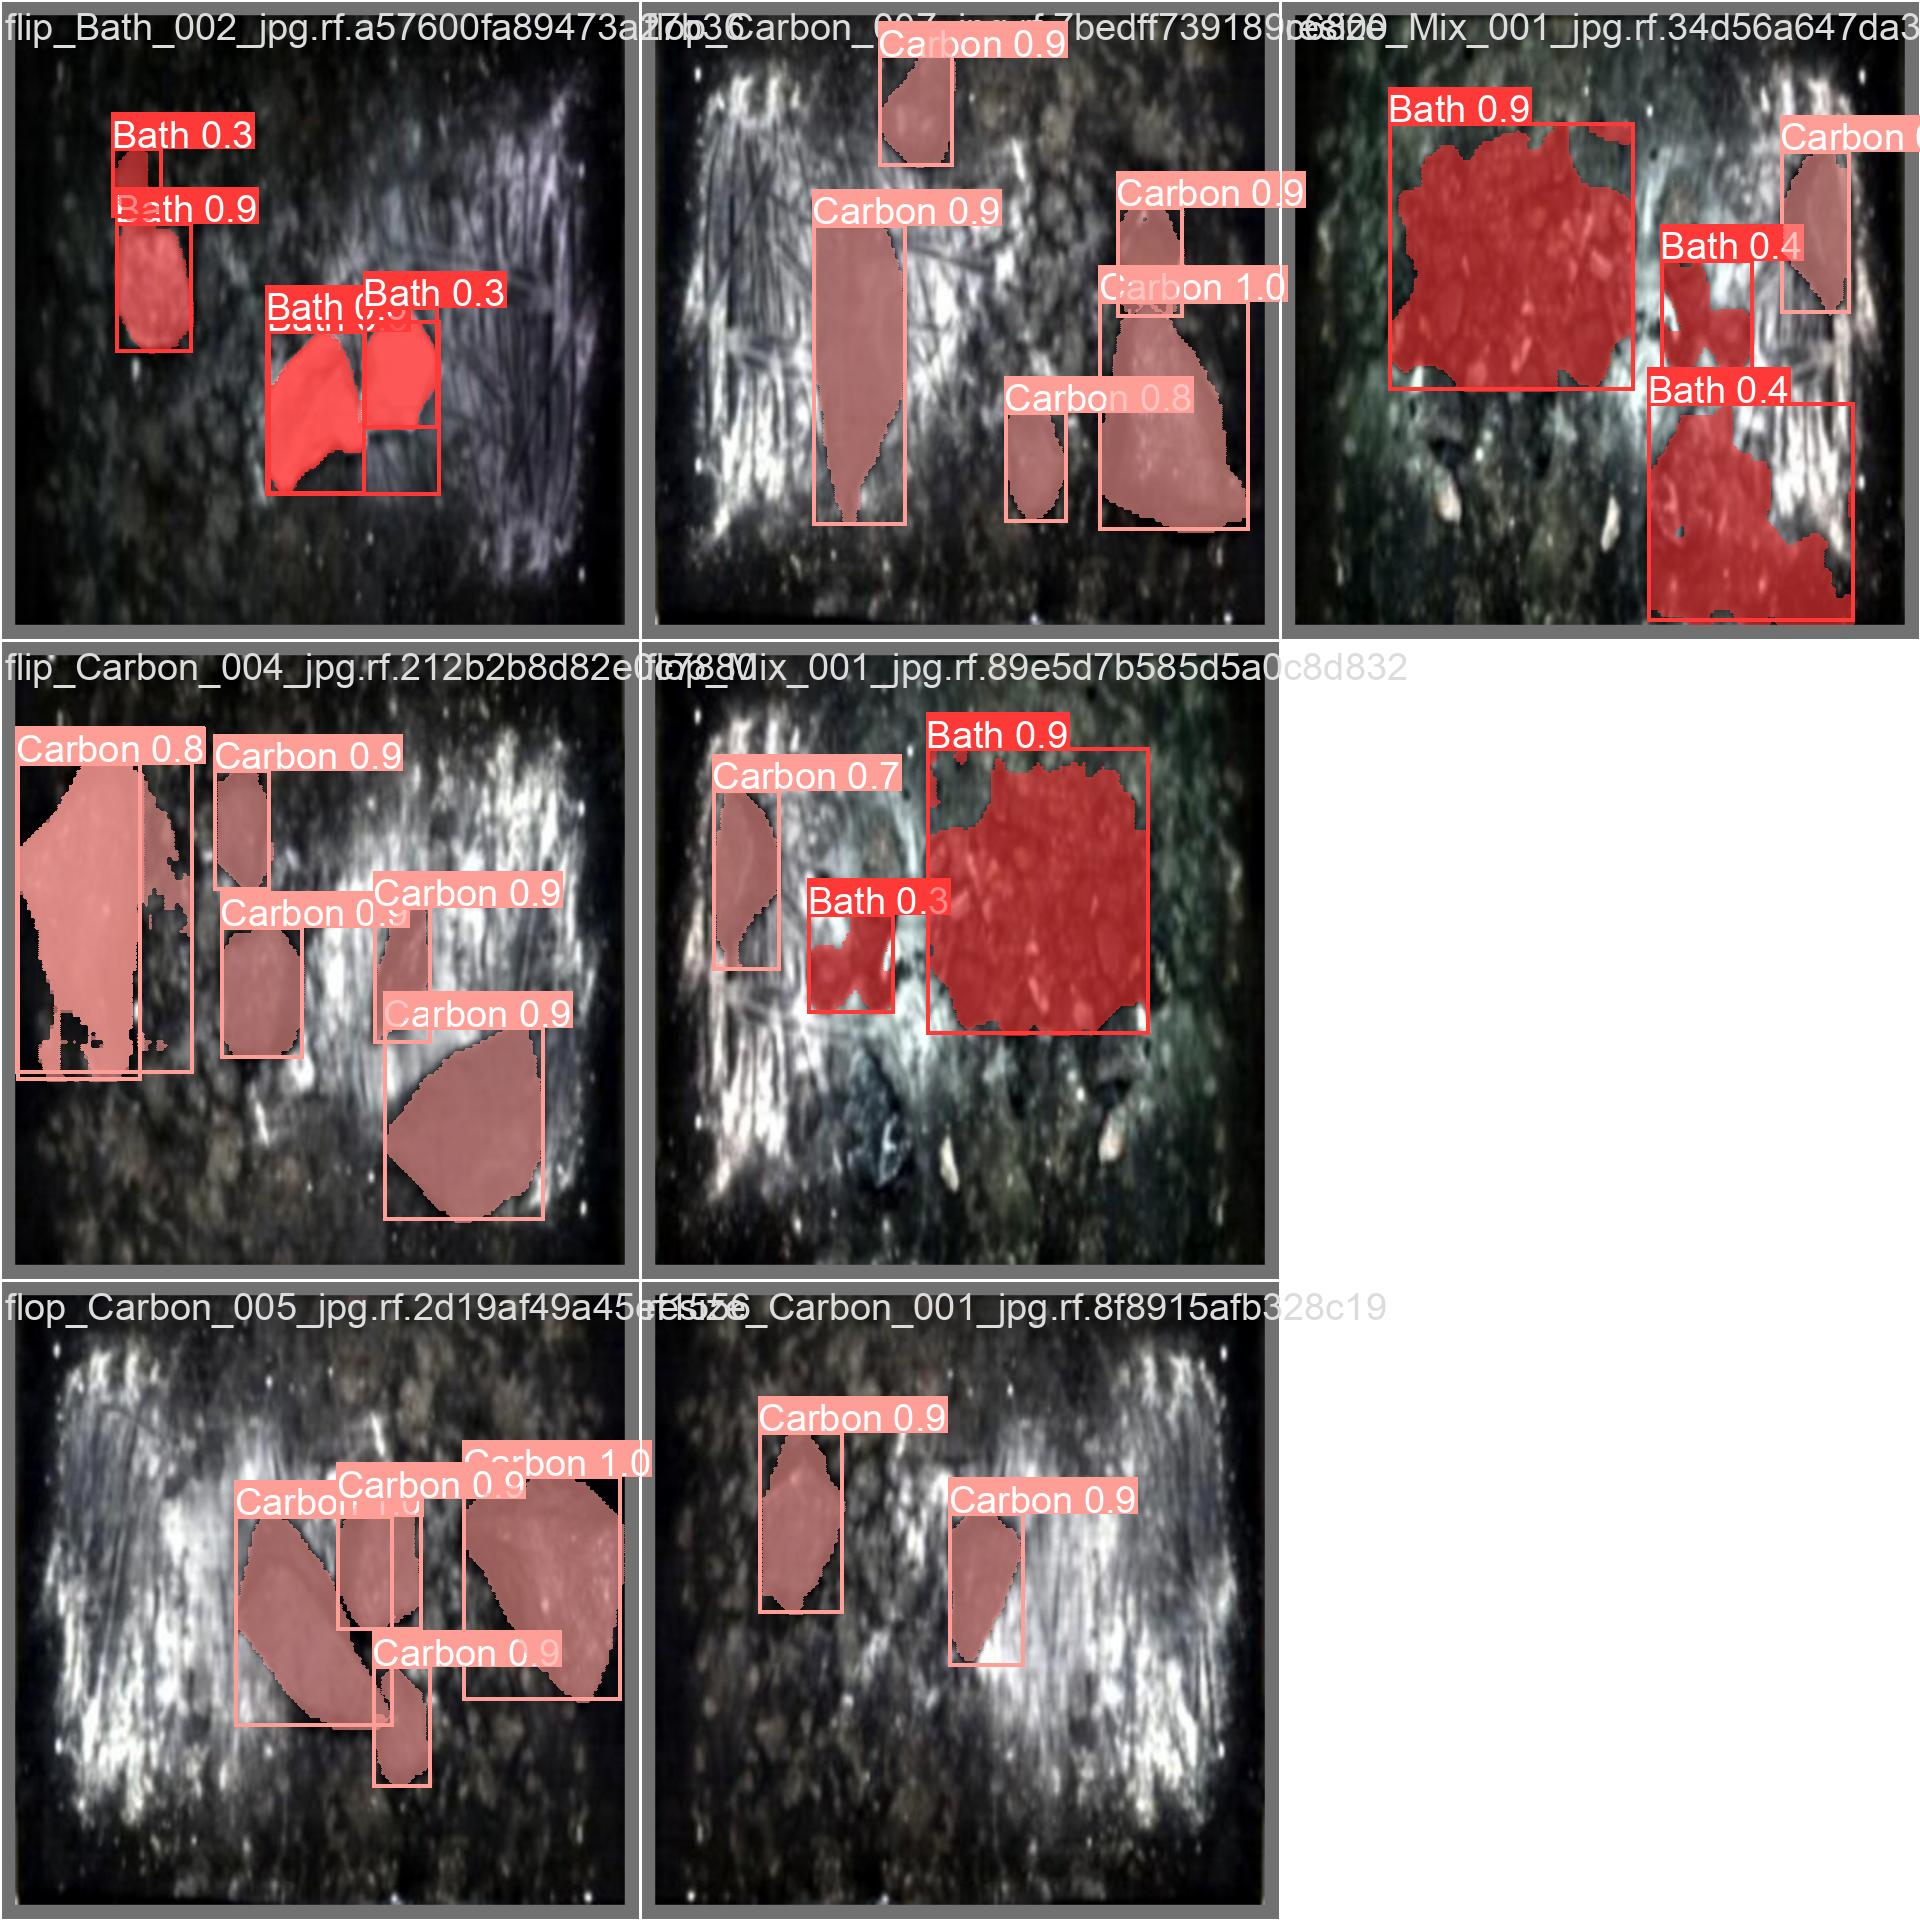

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Carbon_Object_Detection-3/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.850s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.84s/it]
                   all          7         23      0.828      0.162      0.143      0.123      0.985      0.167      0.171      0.123
                  Bath          7          6      0.656      0.323      0.286      0.246       0.97      0.333      0.343      0.246
                Carbon          7      

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/4 /content/datasets/Carbon_Object_Detection-3/test/images/flip_Carbon_001_jpg.rf.160914821a0a8fe6677a78218b425e83.jpg: 640x640 2 Carbons, 20.9ms
image 2/4 /content/datasets/Carbon_Object_Detection-3/test/images/flip_Carbon_003_jpg.rf.1a8fd90e676424d2e1e09350eb4bb964.jpg: 640x640 6 Carbons, 21.0ms
image 3/4 /content/datasets/Carbon_Object_Detection-3/test/images/flop_Bath_003_jpg.rf.7546a704acf990a97f67029dbf5051e7.jpg: 640x640 3 Baths, 20.9ms
image 4/4 /content/datasets/Carbon_Object_Detection-3/test/images/flop_Bath_Rubble_004_jpg.rf.6579c2eaead9848e9463d91c89a2520f.jpg: 640x640 1 Bath, 20.9ms
Speed: 2.8ms preprocess, 20.9ms inference, 150.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


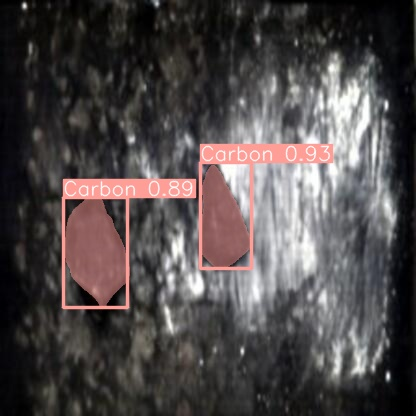

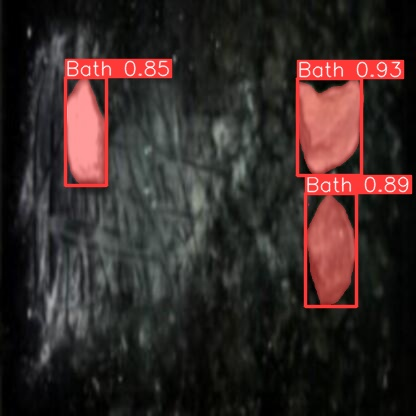

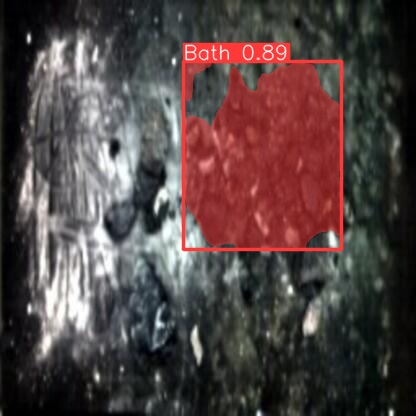

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")
